## Problem Statement

### Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

### Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired the firm EasyVisa for data-driven solutions. You as a data  scientist at EasyVisa have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.

### Data Description

The data contains the different attributes of employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 scikit-learn==1.5.2 matplotlib==3.7.1 seaborn==0.13.1 xgboost==2.0.3 -q --user

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 110.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 127.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 123.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 105.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 3.4 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.25.2 which is incompatible.
plotnine 0.14.5 requires matplotlib>=3

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the below.*

In [ ]:
!pip install imblearn
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# mount the drive to the goole colab as the data is located on Google Drive
from google.colab import drive
drive.mount('/content/drive')
root_path = '<path to the root directory>'

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import recall_score, f1_score
from sklearn.preprocessing import RobustScaler

Mounted at /content/drive


## Import Dataset

In [ ]:
# load the dataset
df = pd.read_csv(f'{root_path}EasyVisa.csv')
df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


## Overview of the Dataset

#### View the first and last 5 rows of the dataset

In [ ]:
# taking a look at the head and the tail of the dataframe
df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


#### Understand the shape of the dataset

In [ ]:
# taking the shape of the datset
df.shape

(25480, 12)

We  have ~25K record with 12 different piece of information about them.


#### Check the data types of the columns for the dataset

In [ ]:
# taking a look at the type of the in each column
df.dtypes

,0
case_id,object
continent,object
education_of_employee,object
has_job_experience,object
requires_job_training,object
no_of_employees,int64
yr_of_estab,int64
region_of_employment,object
prevailing_wage,float64
unit_of_wage,object


## Exploratory Data Analysis (EDA)

#### Let's check the statistical summary of the data

In [ ]:
# Taking a look at some statistics about the data
df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


we can see that the numeric columns have different range of values, more over we see that in the columm "no_of_employees" we have negative values which doesn't make sense. So we have to fix those.

#### Fixing the negative values in number of employees columns

Our hypothesis can be that the number of employees was supposed to be a positive value and wrongly saved with a negative value.
so we will only take the absolute value for them.

first let's see how many are them

In [ ]:
# check the records that have number of employees as negative value
df[df['no_of_employees'] < 0]

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
245,EZYV246,Europe,Master's,N,N,-25,1980,Northeast,39452.9900,Year,Y,Certified
378,EZYV379,Asia,Bachelor's,N,Y,-11,2011,Northeast,32506.1400,Year,Y,Denied
832,EZYV833,South America,Master's,Y,N,-17,2002,South,129701.9400,Year,Y,Certified
2918,EZYV2919,Asia,Master's,Y,N,-26,2005,Midwest,112799.4600,Year,Y,Certified
6439,EZYV6440,Asia,Bachelor's,N,N,-14,2013,South,103.9700,Hour,Y,Denied
6634,EZYV6635,Asia,Bachelor's,Y,N,-26,1923,West,5247.3200,Year,Y,Denied
7224,EZYV7225,Europe,Doctorate,N,N,-25,1998,Midwest,141435.9500,Year,Y,Certified
7281,EZYV7282,Asia,High School,N,N,-14,2000,Midwest,58488.5000,Year,Y,Denied
7318,EZYV7319,Asia,Bachelor's,Y,Y,-26,2006,South,115005.6100,Year,Y,Certified
7761,EZYV7762,Asia,Master's,N,N,-11,2009,Midwest,38457.5100,Year,Y,Certified


we see that we have 33 records with that anomaly. Let's take the absolute value for them.

In [ ]:
# for this column make all of the valus to be positive
df['no_of_employees'] = df['no_of_employees'].abs()
df['no_of_employees'].describe()

,no_of_employees
count,25480.000000
mean,5667.089207
std,22877.917453
min,11.000000
25%,1022.000000
50%,2109.000000
75%,3504.000000
max,602069.000000


#### Let's check the count of each unique category in each of the categorical variables

In [ ]:
# show the number of the unique values in each categorical columns
df.select_dtypes('object').nunique()

,0
case_id,25480
continent,6
education_of_employee,4
has_job_experience,2
requires_job_training,2
region_of_employment,5
unit_of_wage,4
full_time_position,2
case_status,2


### Univariate Analysis

In [ ]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Observations on education of employee

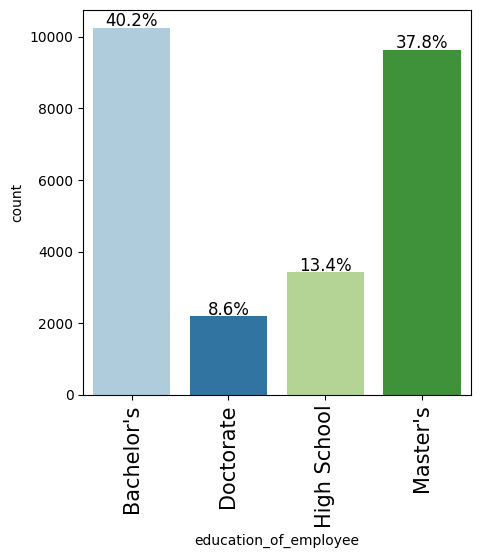

In [ ]:
# show the barplot of the level of education of the applicant
labeled_barplot(df, 'education_of_employee', True)

We can see that majority of applicants have higher education degrees.

#### Observations on region of employment

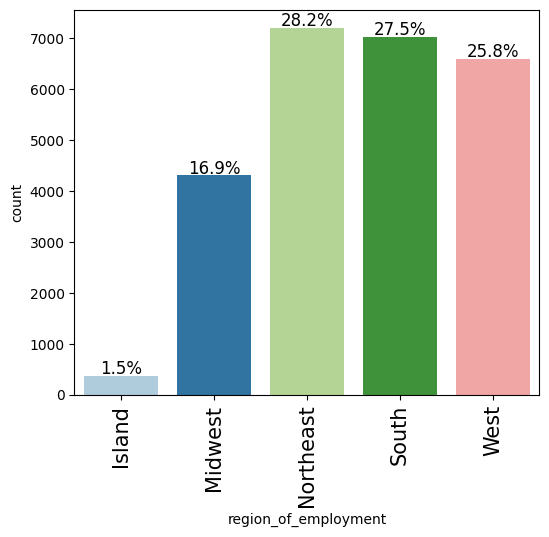

In [ ]:
# taking a look at the barplot of region
labeled_barplot(df, 'region_of_employment', True)

Majority of the applicant tend to work in 'northeast', 'south' and 'west' of the US respectively.

#### Observations on job experience

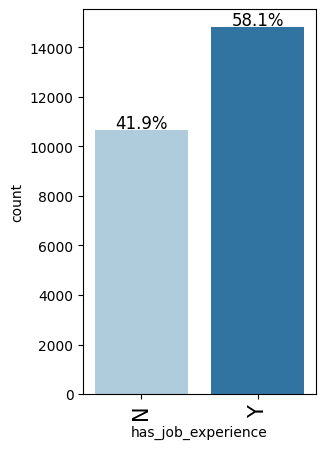

In [ ]:
# making a barplot to show if the applicant had a job experience or not
labeled_barplot(df, 'has_job_experience', True)

we can see that majority of the applicants 58% had job experiences.

#### Observations on case status

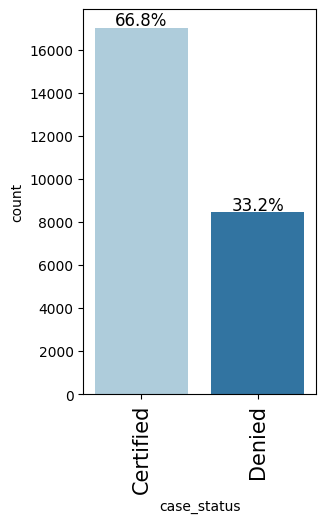

In [ ]:
# take a look at how the case status looks like
labeled_barplot(df, 'case_status', True)

based on our data, we see that the majority of the applicant have been granted the permission. 66.8%

### Bivariate Analysis

**Creating functions that will help us with further analysis.**

In [ ]:
### function to plot distributions wrt target
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [ ]:
def stacked_barplot(data, predictor, target):
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(by=sorter, ascending=False)
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(by=sorter, ascending=False)
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(loc="lower left", frameon=False,)
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

#### Those with higher education may want to travel abroad for a well-paid job. Let's find out if education has any impact on visa certification

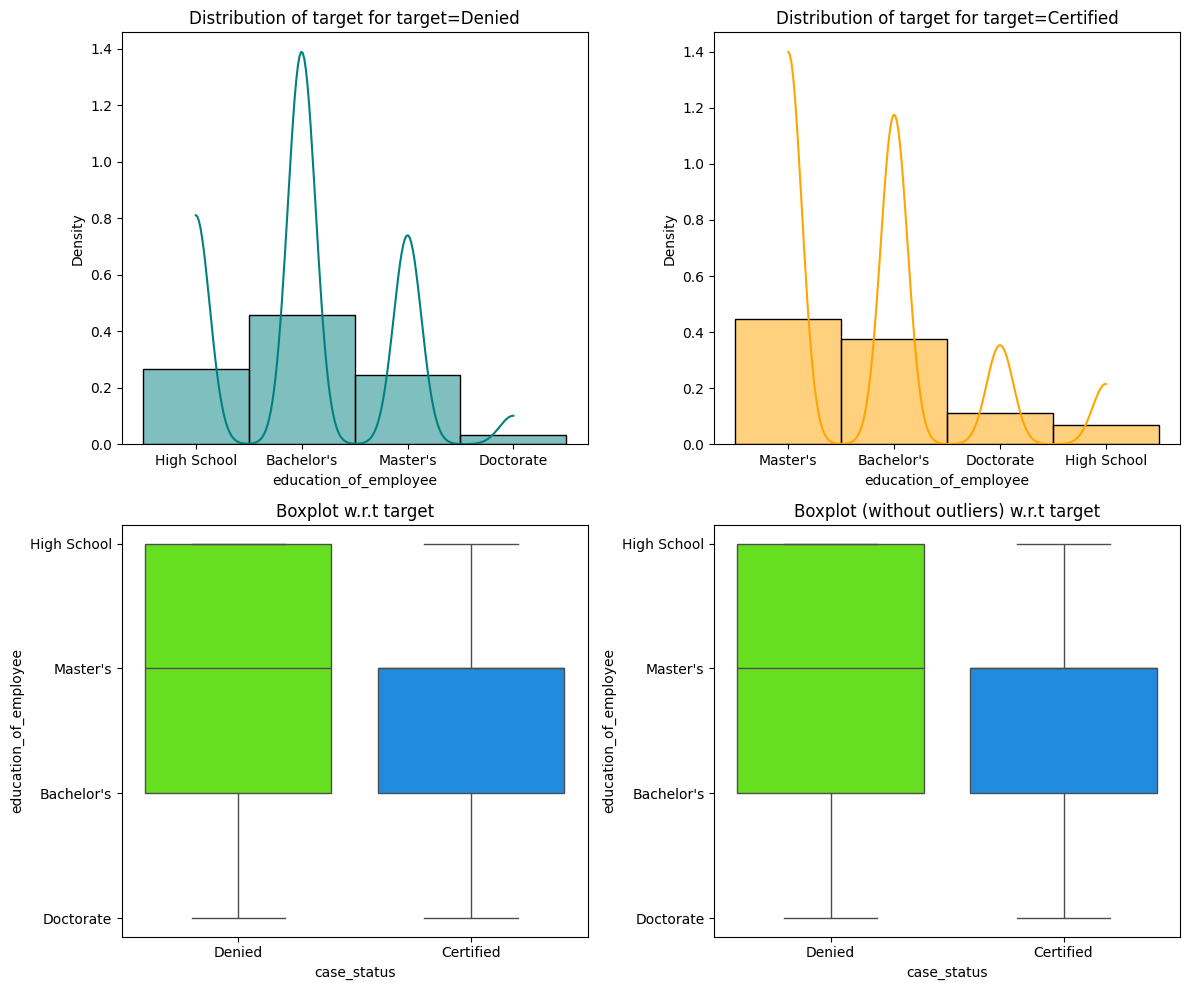

In [ ]:
# checking if level of education impacts the visa certification
distribution_plot_wrt_target(df, 'education_of_employee', 'case_status')

based on the analysis, it seems that having 'Bachelor's' or 'Masters' degree would give higher chance of getting the visa. On the other hand hand having 'High school' degrees leads to having less chance of certification.

#### Lets' similarly check for the continents and find out how the visa status vary across different continents.

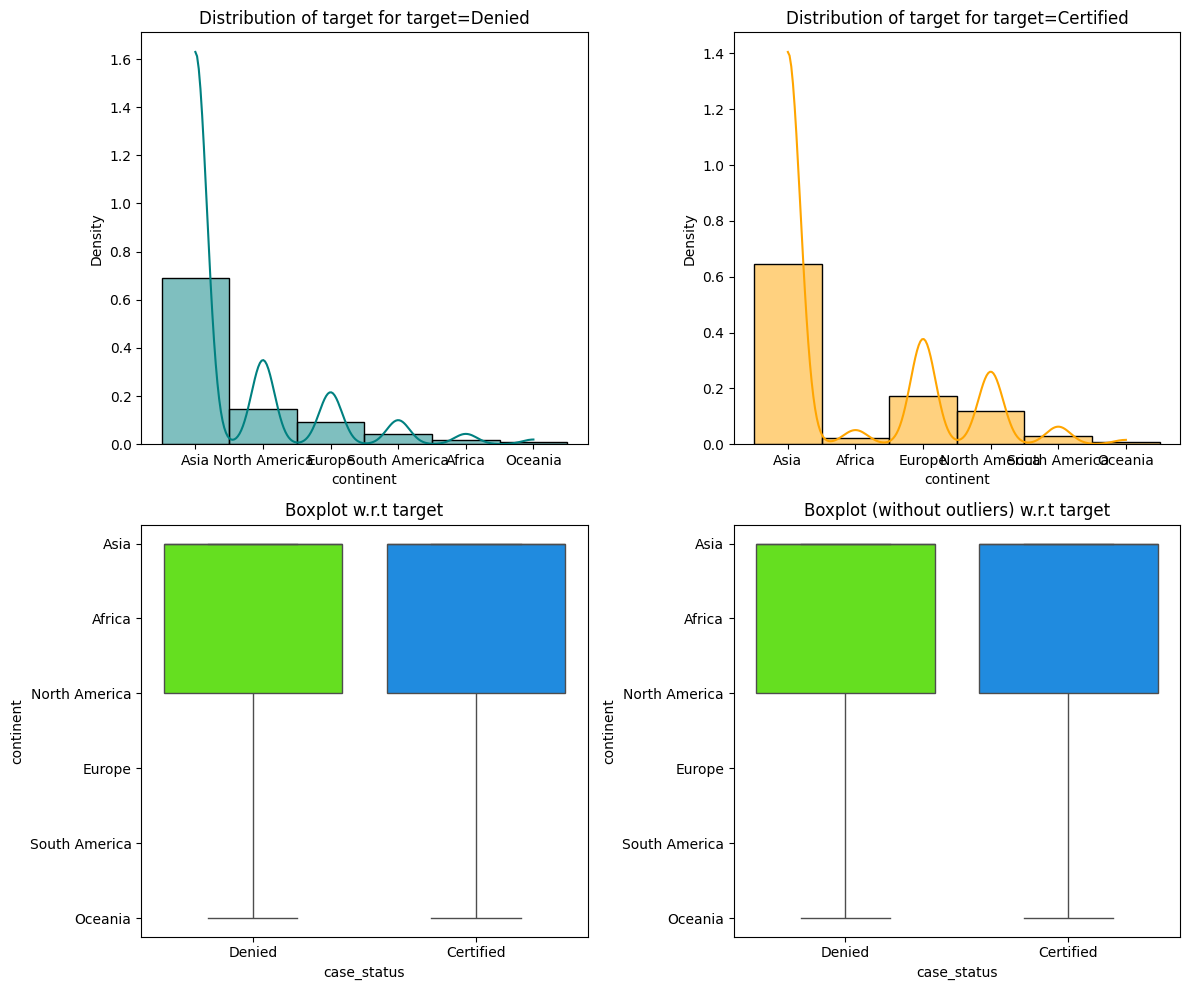

In [ ]:
# checking if the continent of the applicant have any influence on the visa certification
distribution_plot_wrt_target(df, 'continent', 'case_status')

majority of the visa certifications was for people from 'Asia', but we have to consider that there are more applicants from 'Asia' and they are also reciving most of the denials as well.

We can see that people from 'Europe' and 'Africa' have higher change of getting the certificaiton, but on the other hand people from 'North America' are more likely to be denied.

#### Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Let's see if having work experience has any influence over visa certification

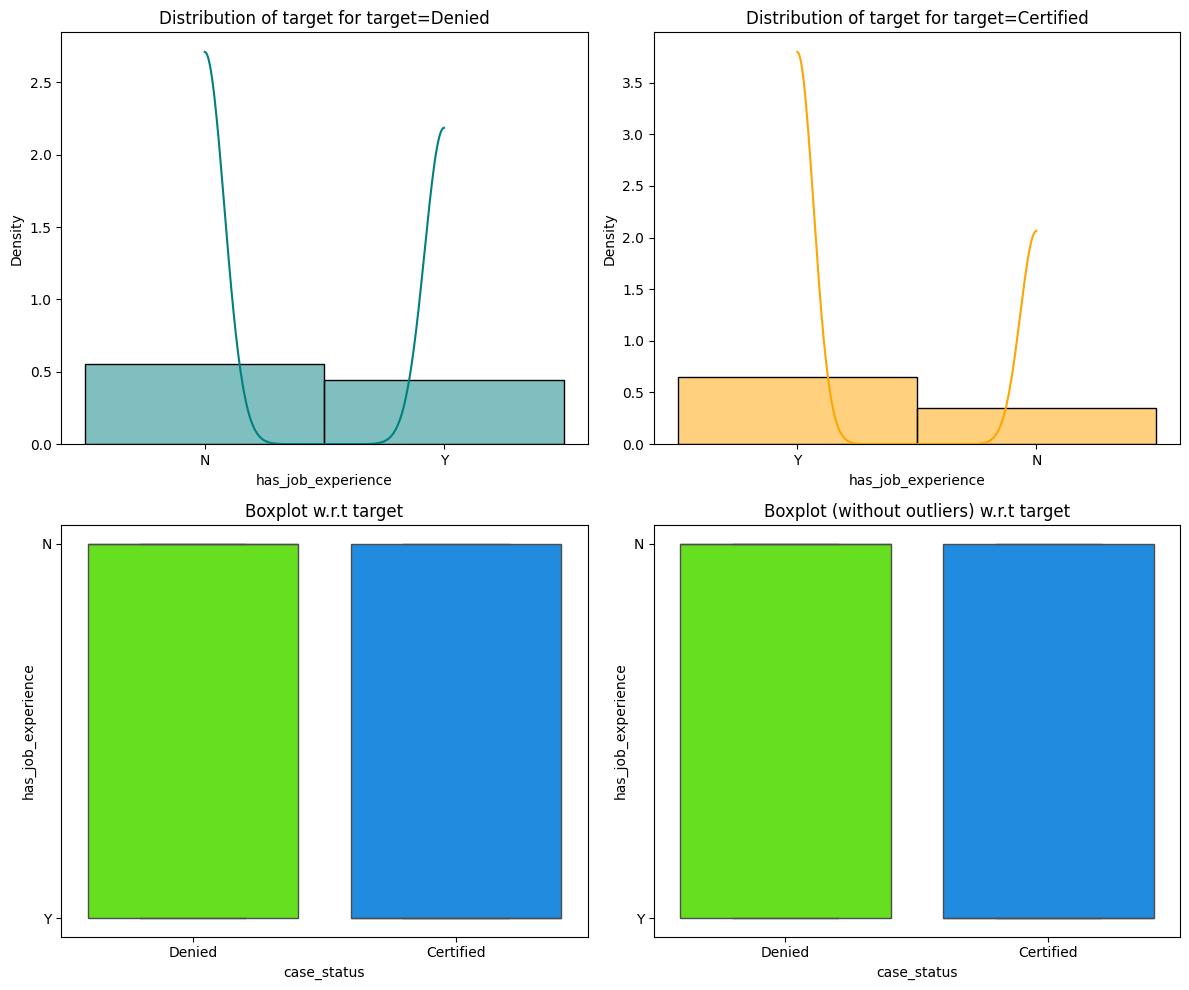

In [ ]:
# checking the influence of the work experience on the visa certification
distribution_plot_wrt_target(df, 'has_job_experience', 'case_status')

we can see that the job experience doesn't influence the decision about the visa certification that much.

#### Checking if the prevailing wage is similar across all the regions of the US

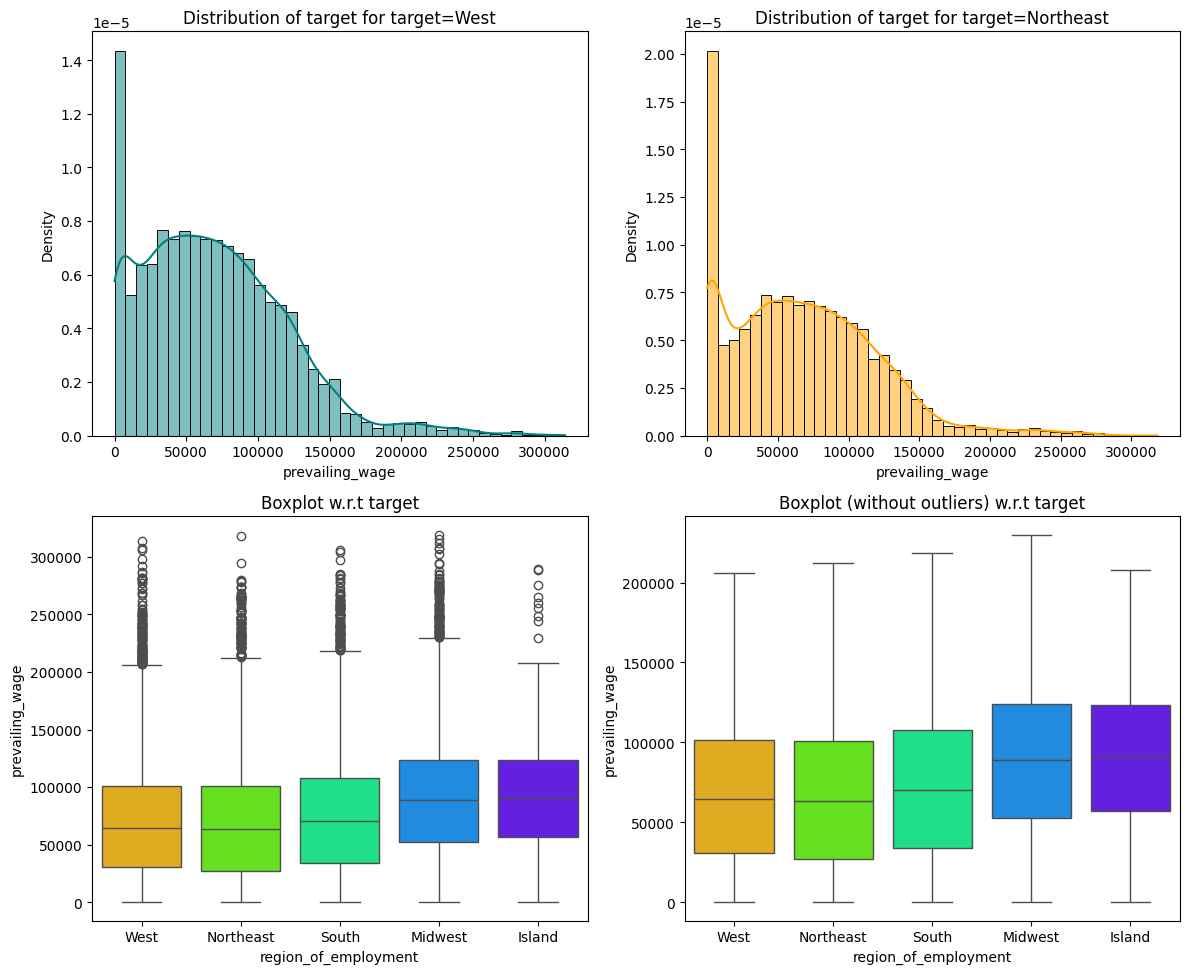

In [ ]:
# checking the prevailing wage for each region
distribution_plot_wrt_target(df,'prevailing_wage', 'region_of_employment')

Wages are relatively consistent across regions. Maybe we have higher wages in Island and Midwest wrt to the other regions.

While our wage data includes various pay units (e.g., hourly, monthly, and annual), the prevalence of annual salaries means this variation has minimal effect on our overall analysis.

#### The US government has established a prevailing wage to protect local talent and foreign workers. Let's analyze the data and see if the visa status changes with the prevailing wage

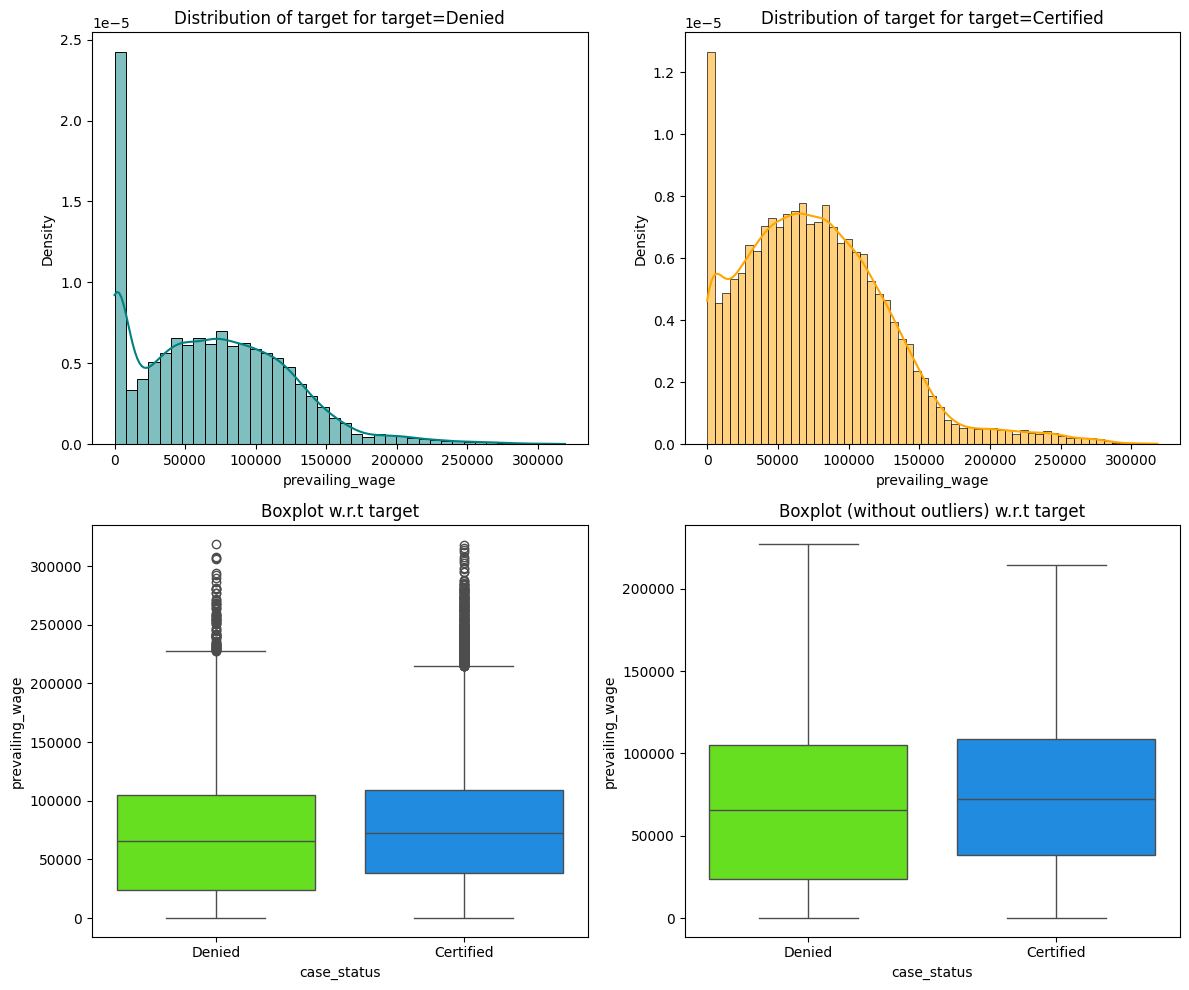

In [ ]:
# checking if the wages has any influence on the case status
distribution_plot_wrt_target(df,'prevailing_wage', 'case_status')

It appears wages have a relatively small impact on the outcome of the request.

#### The prevailing wage has different units (Hourly, Weekly, etc). Let's find out if it has any impact on visa applications getting certified.

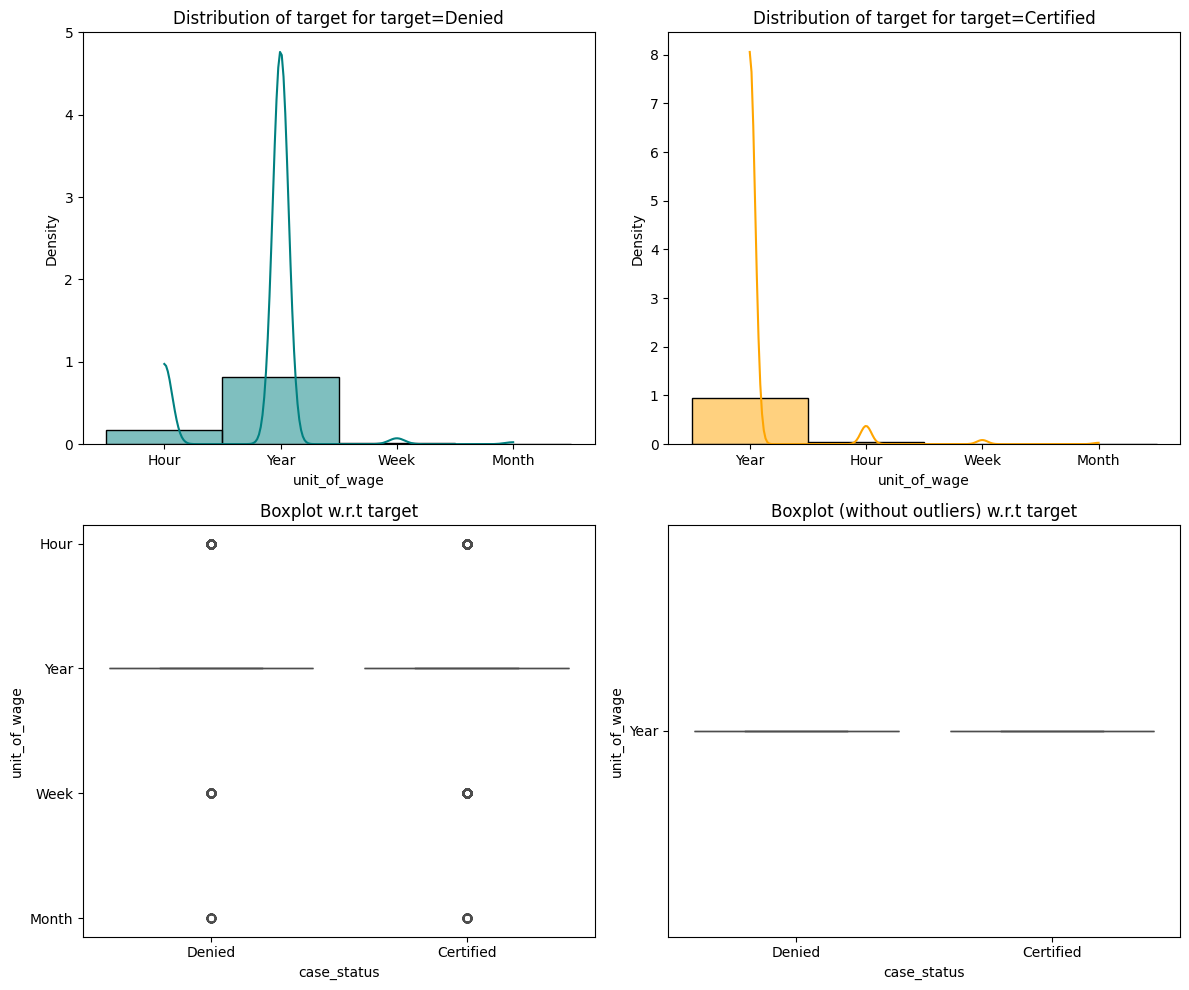

In [ ]:
# checking if the wages has any influence on the case status
distribution_plot_wrt_target(df,'unit_of_wage', 'case_status')

Because the majority of our data uses yearly wage unit, the wage analysis yields limited insights.  However, a potentially interesting finding is that hourly wage cases are more likely to be denied than certified.

## Data Pre-processing

### Outlier Check

In the next step, we will examine the features that have continues values  for potential outliers and determine how to handle those values.


In [ ]:
# this function given a dataframe and a name of a column will
# plot a the box plot of that column
def make_boxplot(df, column):

  # set the size of the plot
  plt.figure(figsize=(8, 4))

  # create and add the pie plot of that feature to the subplot
  plt.boxplot(df[column])

  # set the title of the plot
  plt.title(f'Box plot of {column}')

  # Show the plot
  plt.show()

#### no_of_employees

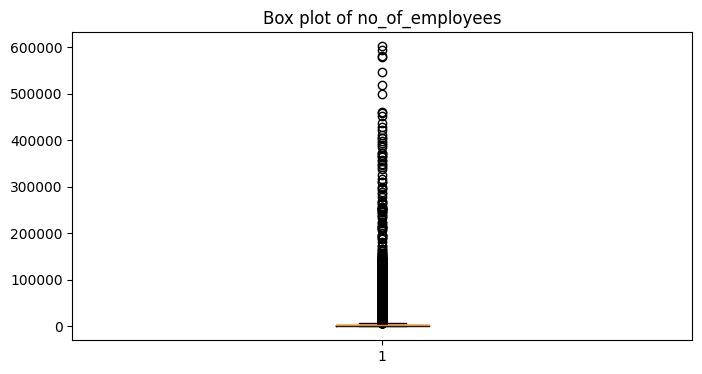

In [ ]:
# make the box plot for the number of the employees
make_boxplot(df, 'no_of_employees')

We can see that there are a lot of missing values in this column.

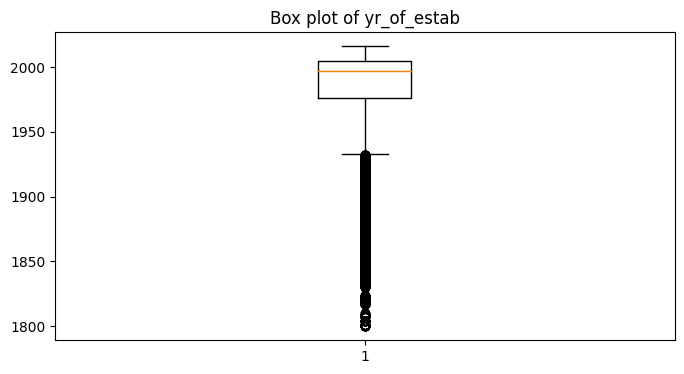

In [ ]:
# make the box plot of the year of establishment of the company
make_boxplot(df, 'yr_of_estab')

#### prevailing_wage   

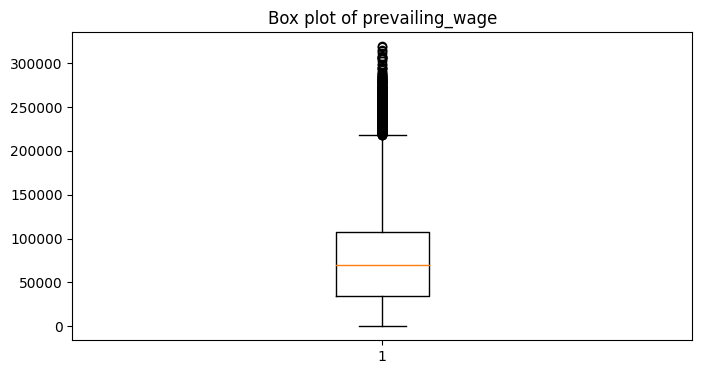

In [ ]:
# making the box plot for prevailing_wage
make_boxplot(df, 'prevailing_wage')

In the columns we examined for outliers, we identified some, but we have decided to retain them in the dataset. This is because factors such as unit wage and the year of establishment can naturally vary among individuals and companies. Additionally, valuable insights can be extracted from the actual year of establishment, and the number of employees depends on the company's size. In summary, we choose to keep the original values as they are useful for our analysis.

### Data Preparation for modeling

Looking at the columns in our data, we have to perform the following steps:
- Remove the 'case_id' column as it doesn't provide useful information for our model
- Encoding the categorical columns into a numerical format using one-hot encoding
- For the target variable 'case_status' we will map 'Denied' to 0 and 'Certified' to 1.

In [ ]:
# Drop the case_id column
df_encoded = df.drop(['case_id'], axis = 1)

# encoding the target variable 'case_status'
df_encoded['case_status'] = df_encoded['case_status'].map({'Certified' : 1, 'Denied': 0})

# get the categorical columns
cat_cols = df_encoded.select_dtypes('object').columns

# encode the categorical values using one-hot encoding
df_encoded = pd.get_dummies(df_encoded, columns = cat_cols)

df_encoded

,no_of_employees,yr_of_estab,prevailing_wage,case_status,continent_Africa,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,...,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,unit_of_wage_Hour,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year,full_time_position_N,full_time_position_Y
0,14513,2007,592.2029,0,0,1,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
1,2412,2002,83425.6500,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
2,44444,2008,122996.8600,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
3,98,1897,83434.0300,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
4,1082,2005,149907.3900,1,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25475,2601,2008,77092.5700,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1
25476,3274,2006,279174.7900,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
25477,1121,1910,146298.8500,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
25478,1918,1887,86154.7700,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1


## Model Building

### Model Evaluation Criterion

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

**We are now done with pre-processing and evaluation criterion, so let's start building the model.**

### Some Useful functions

In [ ]:
# this function given the model, datasets and the name of the models
# will train the model and give some performance metrics of that model
def model_training_report(model, x_train, x_test, y_train, y_test, model_name):

  # fit the model using the training data
  model.fit(x_train, y_train)

  print('-' * 50)
  print(f'Performance of the {model_name} model on Train set: ')

  # Report the performance of the model on the training data
  display(model_performance_classification_sklearn(model, x_train, y_train))

  # plot the confusion matrix of the predictions of the model on the training data
  confusion_matrix_sklearn(model, x_train, y_train)
  plt.show()

  print('-' * 50)
  print(f'Performance of the {model_name} model on Test set: ')

  # Report the performance of the model on the test data
  display(model_performance_classification_sklearn(model, x_test, y_test))

  # plot the confusion matrix of the predictions of the model on the test data
  confusion_matrix_sklearn(model, x_test, y_test)
  plt.show()

  # return the model created
  return model

# this function given the list of models and a dataset will make report of all of those
# models on that dataset
def all_models_performances(models_list, models_names, x_test, y_test, dataset_name, sort_based_on ):

  # this dataframe will hold the performance of all of the models
  all_models_performance = None

  # go over each model
  for model in models_list:

    # get the performance of this model
    model_performance = model_performance_classification_sklearn(model, x_test, y_test)

    # add the performance of this model on this set to the dataframe
    all_models_performance = pd.concat([all_models_performance, model_performance])

  # add the name of the models to the dataframe created
  all_models_performance.index = models_names

  # add the name of the dataset
  all_models_performance['Dataset'] = dataset_name


  # sort the dataframe based on the passed metrics
  all_models_performance = all_models_performance.sort_values(sort_based_on, ascending = False)

  display(all_models_performance)

### Model building with original data

This section focuses on building and comparing the performance of various models trained on the original dataset.

In [ ]:
# separating the features from the target
X, y = df_encoded.drop('case_status', axis = 1), df_encoded['case_status']

# we will also split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_train shape: ', y_train.shape)


X_train shape:  (22932, 28)
X_test shape:  (2548, 28)
y_train shape:  (22932,)
y_train shape:  (22932,)


Then we will pick different models and train them using this original data.

#### Decision Tree

--------------------------------------------------
Performance of the Decision Tree model on Train set: 


,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


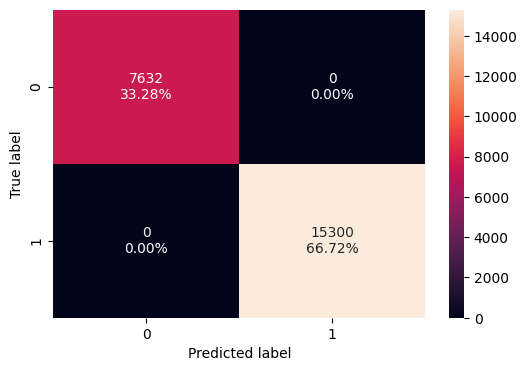

--------------------------------------------------
Performance of the Decision Tree model on Test set: 


,Accuracy,Recall,Precision,F1
0,0.644819,0.722352,0.743559,0.732802


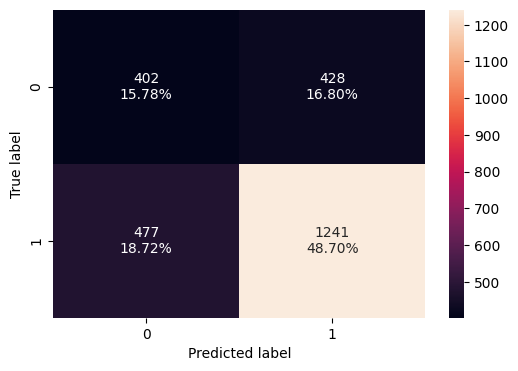

In [ ]:
# create an instance of decision tree classifier model
DT_model = DecisionTreeClassifier(random_state=0)
DT_model = model_training_report(DT_model, X_train, X_test, y_train, y_test, 'Decision Tree')

The large discrepancy in accuracy between the training data (100%) and the test data (64%) strongly suggests overfitting.  This means the model has learned the training data too well, including its noise and specificities, and is therefore performing poorly on unseen data.

#### AdaBoost

--------------------------------------------------
Performance of the AdaBoost model on Train set: 


,Accuracy,Recall,Precision,F1
0,0.736874,0.886667,0.759319,0.818067


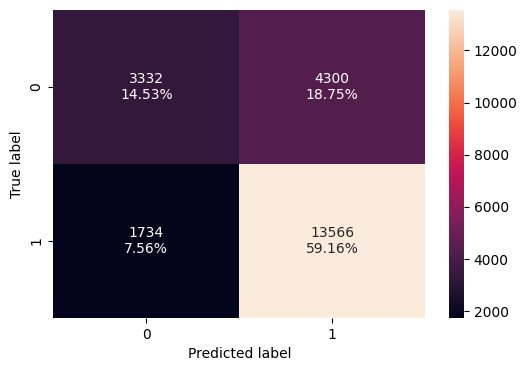

--------------------------------------------------
Performance of the AdaBoost model on Test set: 


,Accuracy,Recall,Precision,F1
0,0.744898,0.883003,0.771617,0.823561


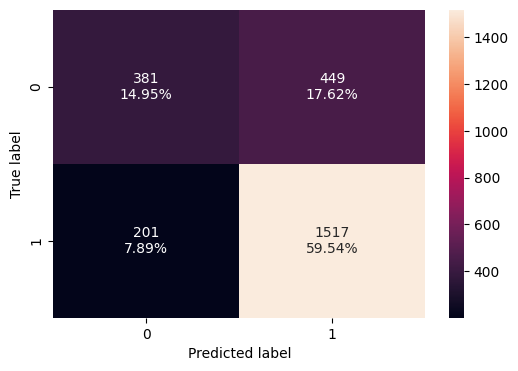

In [ ]:
# create an instance of AdaBoost classifier model
AdaBoost_model = AdaBoostClassifier(random_state=0)
AdaBoost_model = model_training_report(AdaBoost_model, X_train, X_test, y_train, y_test, 'AdaBoost')

Compared to a basic decision tree, AdaBoost model shows two key benefits:
- It avoids overfitting, as evidenced by the similar accuracy on both training and test sets.
- It achieves a 10% performance increase on the test set, rising from 64% to 74%, which is a significant improvement.

#### Random Forest

--------------------------------------------------
Performance of the Random Forest model on Train set: 


,Accuracy,Recall,Precision,F1
0,0.999913,0.999935,0.999935,0.999935


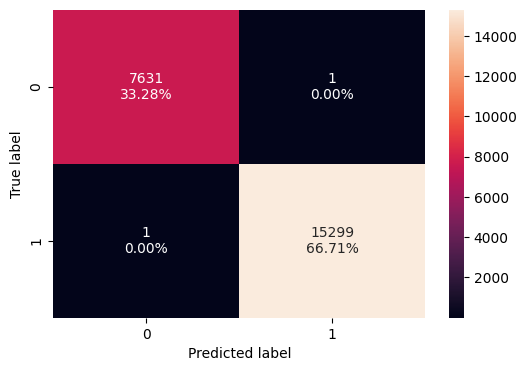

--------------------------------------------------
Performance of the Random Forest model on Test set: 


,Accuracy,Recall,Precision,F1
0,0.724882,0.83702,0.773534,0.804026


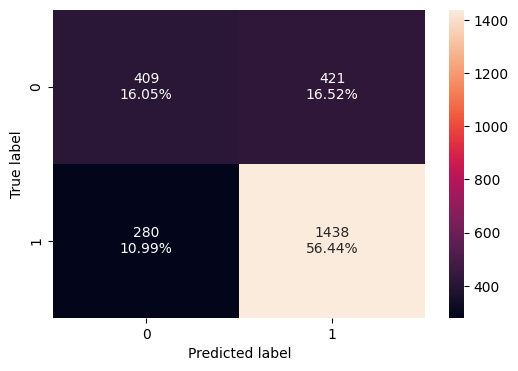

In [ ]:
# create an instance of Random Forest classifier model
Random_Forest_model = RandomForestClassifier(random_state=0, class_weight='balanced')
Random_Forest_model = model_training_report(Random_Forest_model, X_train, X_test, y_train, y_test, 'Random Forest')

While a random forest outperforms a basic decision tree on the test data (72% vs. 64%), it exhibits overfitting, as the training accuracy (99%) is significantly higher than the test accuracy (72%).  Furthermore, the random forest offers no performance advantage over AdaBoost.

#### Gradient Boosting  



--------------------------------------------------
Performance of the Gradient Boosting model on Train set: 


,Accuracy,Recall,Precision,F1
0,0.752442,0.874771,0.780636,0.825027


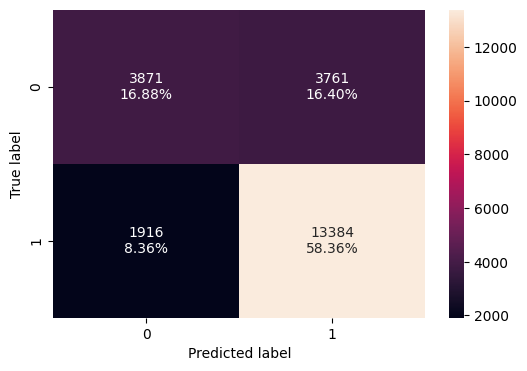

--------------------------------------------------
Performance of the Gradient Boosting model on Test set: 


,Accuracy,Recall,Precision,F1
0,0.760989,0.877183,0.791076,0.831907


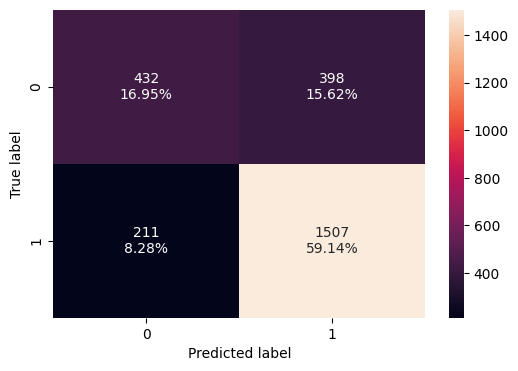

In [ ]:
# create an instance of Gradient Boosting classifier model
Gradient_Boost_model = GradientBoostingClassifier(random_state=0)
Gradient_Boost_model = model_training_report(Gradient_Boost_model, X_train, X_test, y_train, y_test, 'Gradient Boosting')

Of all the models evaluated up to now, Gradient Boosting performed best.  It avoids overfitting and improves test set accuracy by 2% (from 74% with AdaBoost to 76%).

#### XGBoost

--------------------------------------------------
Performance of the XGBoost model on Train set: 


,Accuracy,Recall,Precision,F1
0,0.824568,0.919608,0.834371,0.874918


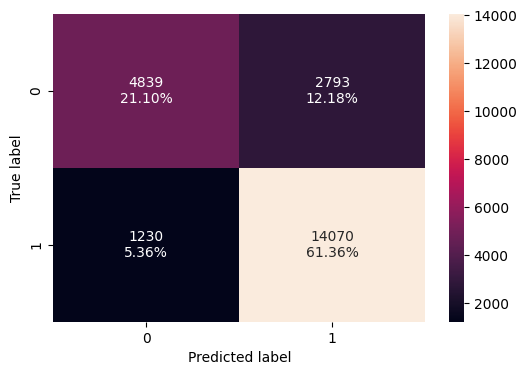

--------------------------------------------------
Performance of the XGBoost model on Test set: 


,Accuracy,Recall,Precision,F1
0,0.740188,0.856228,0.779958,0.816315


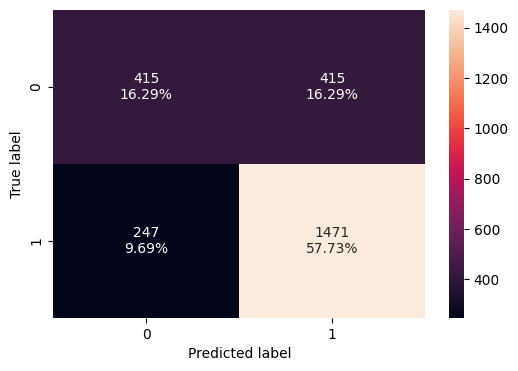

In [ ]:
# create an instance of XGBoost classifier model
XGBoost_model = xgb.XGBClassifier(seed=0)
XGBoost_model = model_training_report(XGBoost_model, X_train, X_test, y_train, y_test, 'XGBoost')

XGBoost did not yield any improvement in accuracy over the previously tested models.

#### Summary Report

In [ ]:
# list of the models created
models_list = [DT_model, AdaBoost_model, Random_Forest_model, Gradient_Boost_model, XGBoost_model]
models_names = ['Decision Tree', 'AdaBoost', 'Random Forest', 'Gradient Boosting', 'XGBoost']

##### On the training set

In [ ]:
# make summary about the models
all_models_performances(models_list, models_names, X_train, y_train, 'Training Data', 'Accuracy')

,Accuracy,Recall,Precision,F1,Dataset
Decision Tree,1.000000,1.000000,1.000000,1.000000,Training Data
Random Forest,0.999913,0.999935,0.999935,0.999935,Training Data
XGBoost,0.824568,0.919608,0.834371,0.874918,Training Data
Gradient Boosting,0.752442,0.874771,0.780636,0.825027,Training Data
AdaBoost,0.736874,0.886667,0.759319,0.818067,Training Data


##### On the test set

In [ ]:
# make summary about the models
all_models_performances(models_list, models_names, X_test, y_test, 'Test Data', 'Accuracy')

,Accuracy,Recall,Precision,F1,Dataset
Gradient Boosting,0.760989,0.877183,0.791076,0.831907,Test Data
AdaBoost,0.744898,0.883003,0.771617,0.823561,Test Data
XGBoost,0.740188,0.856228,0.779958,0.816315,Test Data
Random Forest,0.724882,0.837020,0.773534,0.804026,Test Data
Decision Tree,0.644819,0.722352,0.743559,0.732802,Test Data


### Model Building with oversampled data

Oversampling aims to balance class representation by increasing the number of samples in the minority class(es) to match the majority class(es).  In this case, we'll use the SMOTE technique to generate synthetic samples and augment the minority class.

In [ ]:
# create a SMOTE object to apply the over sampling
Smote_obj = SMOTE(random_state=0)

# separating the features from the target
X, y = df_encoded.drop('case_status', axis = 1), df_encoded['case_status']

# we will also split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

# oversampling the minority class
X_train_oversampled, y_train_oversampled = Smote_obj.fit_resample(X_train, y_train)

print('X_train_oversampled shape: ', X_train_oversampled.shape)
print('X_test shape: ', X_test.shape)
print('y_train_oversampled shape: ', y_train_oversampled.shape)
print('y_test shape: ', y_test.shape)

X_train_oversampled shape:  (30600, 28)
X_test shape:  (2548, 28)
y_train_oversampled shape:  (30600,)
y_test shape:  (2548,)


#### Decision Tree

--------------------------------------------------
Performance of the Decision Tree model on Train set: 


,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


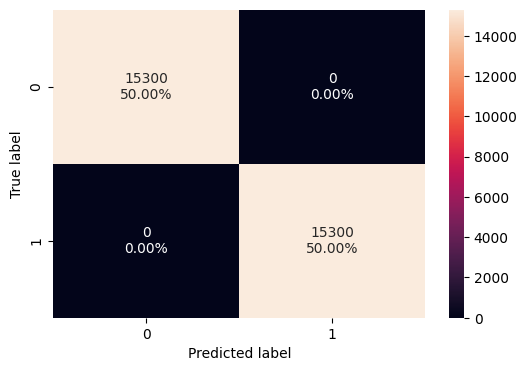

--------------------------------------------------
Performance of the Decision Tree model on Test set: 


,Accuracy,Recall,Precision,F1
0,0.664835,0.738068,0.758373,0.748083


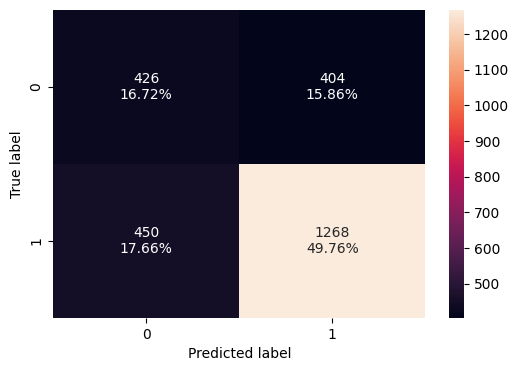

In [ ]:
# create an instance of decision tree classifier model
DT_model = DecisionTreeClassifier(random_state=0)
DT_model = model_training_report(DT_model, X_train_oversampled, X_test, y_train_oversampled, y_test, 'Decision Tree')

The significant difference in accuracy between training (100%) and test (66%) data indicates overfitting. While we've managed to improve test accuracy by 2% (from 64% to 66%), the overfitting issue still needs to be addressed.

#### AdaBoost

--------------------------------------------------
Performance of the AdaBoost model on Train set: 


,Accuracy,Recall,Precision,F1
0,0.797451,0.871699,0.758992,0.81145


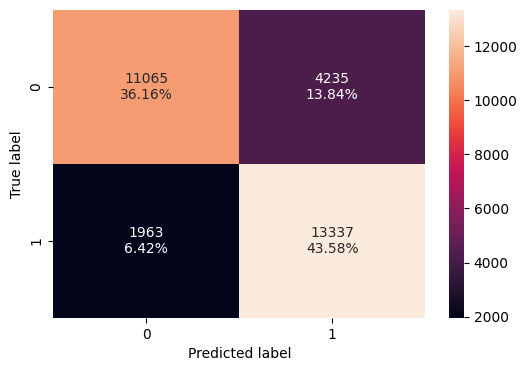

--------------------------------------------------
Performance of the AdaBoost model on Test set: 


,Accuracy,Recall,Precision,F1
0,0.740188,0.870198,0.773009,0.818729


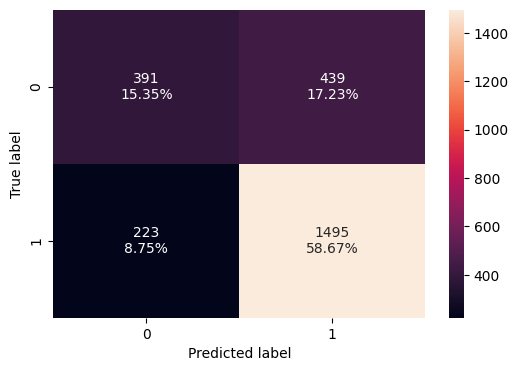

In [ ]:
# create an instance of AdaBoost classifier model
AdaBoost_model = AdaBoostClassifier(random_state=0)
AdaBoost_model = model_training_report(AdaBoost_model, X_train_oversampled, X_test, y_train_oversampled, y_test, 'AdaBoost')

Oversampling the training data did not improve AdaBoost's accuracy on the test set.

#### Random Forest

--------------------------------------------------
Performance of the Random Forest model on Train set: 


,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


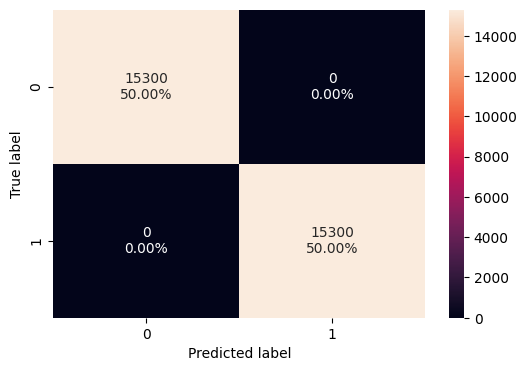

--------------------------------------------------
Performance of the Random Forest model on Test set: 


,Accuracy,Recall,Precision,F1
0,0.72606,0.824214,0.781457,0.802266


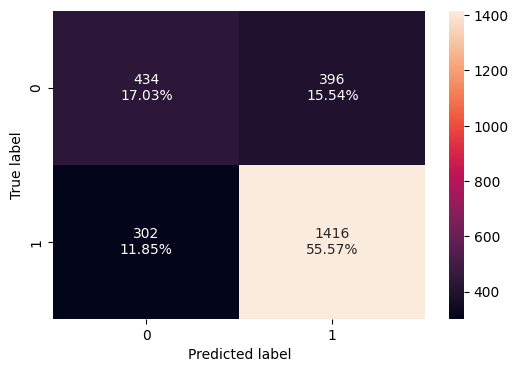

In [ ]:
# create an instance of Random Forest classifier model
Random_Forest_model = RandomForestClassifier(random_state=0)
Random_Forest_model = model_training_report(Random_Forest_model, X_train_oversampled, X_test, y_train_oversampled, y_test, 'Random Forest')

Oversampling the training data did not improve Random Forest's accuracy on the test set that much. (only 1%).

#### Gradient Boosting  



--------------------------------------------------
Performance of the Gradient Boosting model on Train set: 


,Accuracy,Recall,Precision,F1
0,0.808105,0.842941,0.788036,0.814565


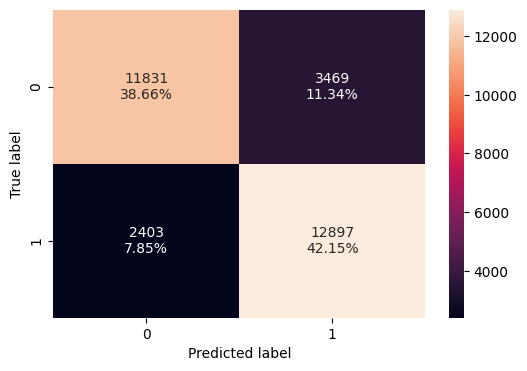

--------------------------------------------------
Performance of the Gradient Boosting model on Test set: 


,Accuracy,Recall,Precision,F1
0,0.751962,0.843423,0.799669,0.820963


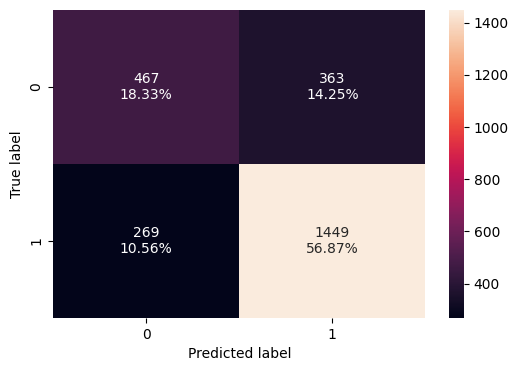

In [ ]:
# create an instance of Gradient Boosting classifier model
Gradient_Boost_model = GradientBoostingClassifier(random_state=0)
Gradient_Boost_model = model_training_report(Gradient_Boost_model, X_train_oversampled, X_test, y_train_oversampled, y_test, 'Gradient Boosting')

Oversampling the training data did not improve Gradient Boosting's accuracy on the test set.

#### XGBoost

--------------------------------------------------
Performance of the XGBoost model on Train set: 


,Accuracy,Recall,Precision,F1
0,0.86585,0.91085,0.835642,0.871626


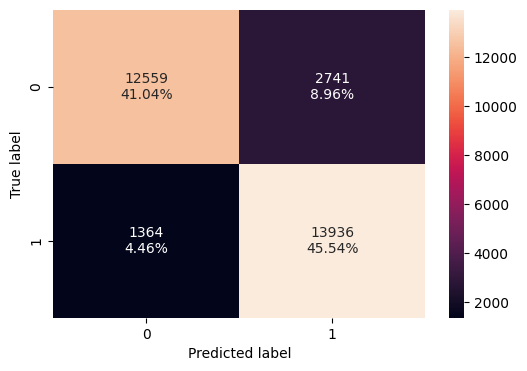

--------------------------------------------------
Performance of the XGBoost model on Test set: 


,Accuracy,Recall,Precision,F1
0,0.740581,0.855646,0.780669,0.81644


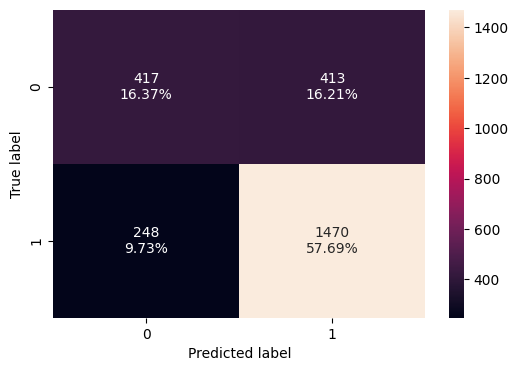

In [ ]:
# create an instance of XGBoost classifier model
XGBoost_model = xgb.XGBClassifier(seed=0)
XGBoost_model = model_training_report(XGBoost_model, X_train_oversampled, X_test, y_train_oversampled, y_test, 'XGBoost')

Oversampling the training data did not improve XGBoost's accuracy on the test set that much (only 1%).

#### Summary Report

In [ ]:
# list of the models created
models_list = [DT_model, AdaBoost_model, Random_Forest_model, Gradient_Boost_model, XGBoost_model]
models_names = ['Decision Tree', 'AdaBoost', 'Random Forest', 'Gradient Boosting', 'XGBoost']

##### On the training set

In [ ]:
# make summary about the models
all_models_performances(models_list, models_names, X_train_oversampled, y_train_oversampled, 'Training Data Oversampled', 'Accuracy')

,Accuracy,Recall,Precision,F1,Dataset
Decision Tree,1.000000,1.000000,1.000000,1.000000,Training Data Oversampled
Random Forest,1.000000,1.000000,1.000000,1.000000,Training Data Oversampled
XGBoost,0.865850,0.910850,0.835642,0.871626,Training Data Oversampled
Gradient Boosting,0.808105,0.842941,0.788036,0.814565,Training Data Oversampled
AdaBoost,0.797451,0.871699,0.758992,0.811450,Training Data Oversampled


##### On the test set

In [ ]:
# make summary about the models
all_models_performances(models_list, models_names, X_test, y_test, 'Test Data', 'Accuracy')

,Accuracy,Recall,Precision,F1,Dataset
Gradient Boosting,0.751962,0.843423,0.799669,0.820963,Test Data
XGBoost,0.740581,0.855646,0.780669,0.816440,Test Data
AdaBoost,0.740188,0.870198,0.773009,0.818729,Test Data
Random Forest,0.726060,0.824214,0.781457,0.802266,Test Data
Decision Tree,0.664835,0.738068,0.758373,0.748083,Test Data


### Model Building with undersampled data

Undersampling balances imbalanced datasets by reducing the number of majority class samples. This helps prevent model bias and can improve performance on the minority class, but it also risks losing potentially useful information

In [ ]:
# an object to perform undersampling technique
Undersample_obj = RandomUnderSampler(random_state=0)

# undersampling the training data
X_train_undersampled, y_train_undersampled = Undersample_obj.fit_resample(X_train, y_train)

# separating the features from the target
X, y = df_encoded.drop('case_status', axis = 1), df_encoded['case_status']

# we will also split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

# undersampling the training data
X_train_undersampled, y_train_undersampled = Undersample_obj.fit_resample(X_train, y_train)

print('X_train_undersampled shape: ', X_train_undersampled.shape)
print('X_test shape: ', X_test.shape)
print('y_train_undersampled shape: ', y_train_undersampled.shape)
print('y_test shape: ', y_test.shape)

X_train_undersampled shape:  (15264, 28)
X_test shape:  (2548, 28)
y_train_undersampled shape:  (15264,)
y_test shape:  (2548,)


#### Decision Tree

--------------------------------------------------
Performance of the Decision Tree model on Train set: 


,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


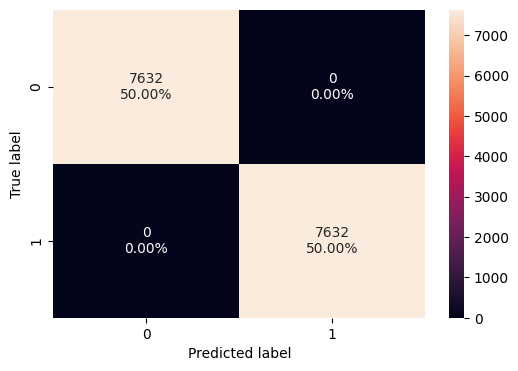

--------------------------------------------------
Performance of the Decision Tree model on Test set: 


,Accuracy,Recall,Precision,F1
0,0.630298,0.637951,0.774011,0.699426


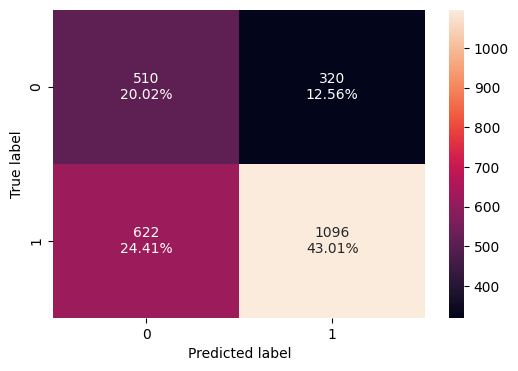

In [ ]:
# create an instance of decision tree classifier model
DT_model = DecisionTreeClassifier(random_state=0)
DT_model = model_training_report(DT_model, X_train_undersampled, X_test, y_train_undersampled, y_test, 'Decision Tree')

Undersampling the training data did not improve Decision Tree's accuracy on the test set.


#### AdaBoost

--------------------------------------------------
Performance of the AdaBoost model on Train set: 


,Accuracy,Recall,Precision,F1
0,0.695427,0.709382,0.690121,0.699619


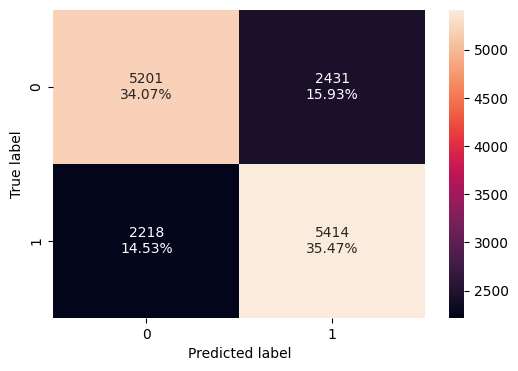

--------------------------------------------------
Performance of the AdaBoost model on Test set: 


,Accuracy,Recall,Precision,F1
0,0.703297,0.717113,0.82024,0.765217


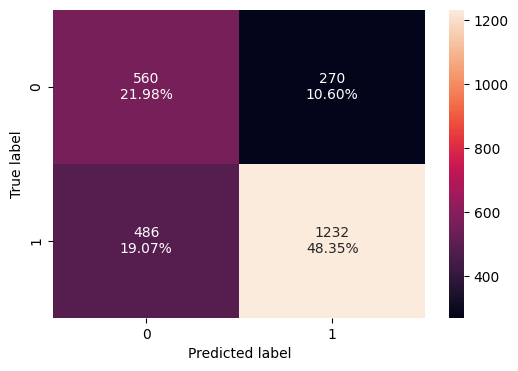

In [ ]:
# create an instance of AdaBoost classifier model
AdaBoost_model = AdaBoostClassifier(random_state=0)
AdaBoost_model = model_training_report(AdaBoost_model, X_train_undersampled, X_test, y_train_undersampled, y_test, 'AdaBoost')

Undersampling the training data did not improve AdaBoost's accuracy on the test set.


#### Random Forest

--------------------------------------------------
Performance of the Random Forest model on Train set: 


,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


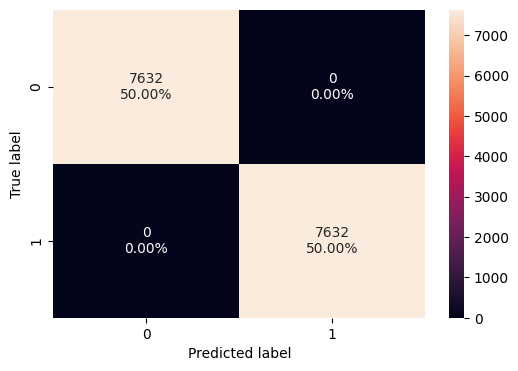

--------------------------------------------------
Performance of the Random Forest model on Test set: 


,Accuracy,Recall,Precision,F1
0,0.678964,0.671711,0.819602,0.738324


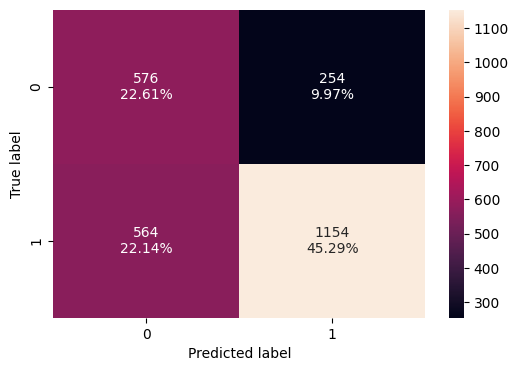

In [ ]:
# create an instance of Random Forest classifier model
Random_Forest_model = RandomForestClassifier(random_state=0)
Random_Forest_model = model_training_report(Random_Forest_model, X_train_undersampled, X_test, y_train_undersampled, y_test, 'Random Forest')

Undersampling the training data did not improve Random Forest's accuracy on the test set.


#### Gradient Boosting  



--------------------------------------------------
Performance of the Gradient Boosting model on Train set: 


,Accuracy,Recall,Precision,F1
0,0.715736,0.730608,0.709505,0.719902


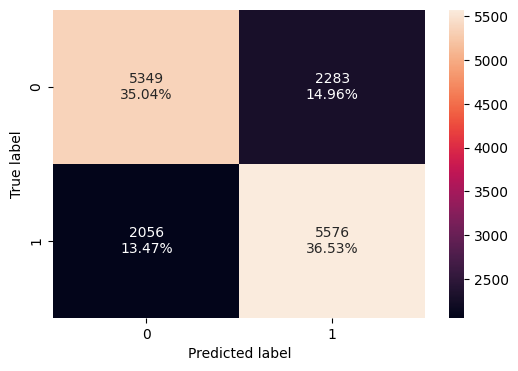

--------------------------------------------------
Performance of the Gradient Boosting model on Test set: 


,Accuracy,Recall,Precision,F1
0,0.711931,0.726426,0.825397,0.772755


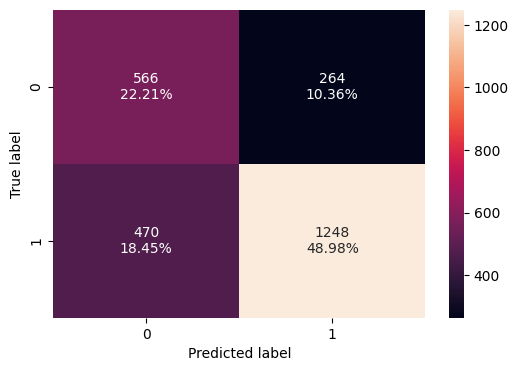

In [ ]:
# create an instance of Gradient Boosting classifier model
Gradient_Boost_model = GradientBoostingClassifier(random_state=0)
Gradient_Boost_model = model_training_report(Gradient_Boost_model, X_train_undersampled, X_test, y_train_undersampled, y_test, 'Gradient Boosting')

Undersampling the training data did not improve Gradient Boosting's accuracy on the test set.


#### XGBoost

--------------------------------------------------
Performance of the XGBoost model on Train set: 


,Accuracy,Recall,Precision,F1
0,0.83484,0.837919,0.832791,0.835347


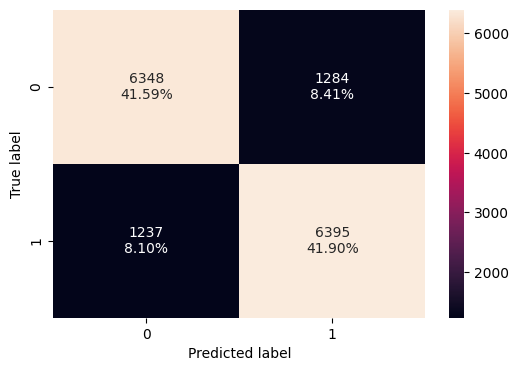

--------------------------------------------------
Performance of the XGBoost model on Test set: 


,Accuracy,Recall,Precision,F1
0,0.696232,0.700815,0.822404,0.756757


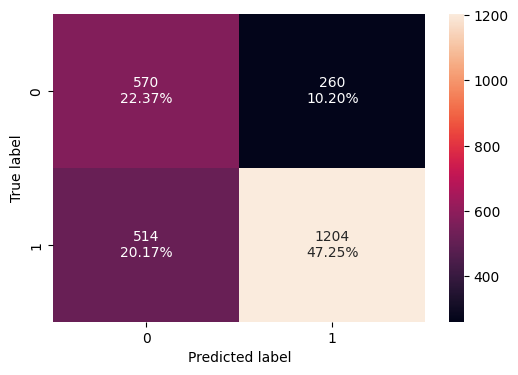

In [ ]:
# create an instance of XGBoost classifier model
XGBoost_model = xgb.XGBClassifier(seed=0)
XGBoost_model = model_training_report(XGBoost_model, X_train_undersampled, X_test, y_train_undersampled, y_test, 'XGBoost')

Undersampling the training data did not improve XGBoost's accuracy on the test set.

#### Summary Report

In [ ]:
# list of the models created
models_list = [DT_model, AdaBoost_model, Random_Forest_model, Gradient_Boost_model, XGBoost_model]
models_names = ['Decision Tree', 'AdaBoost', 'Random Forest', 'Gradient Boosting', 'XGBoost']

##### On the training set

In [ ]:
# make summary about the models
all_models_performances(models_list, models_names, X_train_undersampled, y_train_undersampled, 'Training Data Undersampled', 'Accuracy')

,Accuracy,Recall,Precision,F1,Dataset
Decision Tree,1.000000,1.000000,1.000000,1.000000,Training Data Undersampled
Random Forest,1.000000,1.000000,1.000000,1.000000,Training Data Undersampled
XGBoost,0.834840,0.837919,0.832791,0.835347,Training Data Undersampled
Gradient Boosting,0.715736,0.730608,0.709505,0.719902,Training Data Undersampled
AdaBoost,0.695427,0.709382,0.690121,0.699619,Training Data Undersampled


##### On the test set

In [ ]:
# make summary about the models
all_models_performances(models_list, models_names, X_test, y_test, 'Test Data', 'Accuracy')

,Accuracy,Recall,Precision,F1,Dataset
Gradient Boosting,0.711931,0.726426,0.825397,0.772755,Test Data
AdaBoost,0.703297,0.717113,0.820240,0.765217,Test Data
XGBoost,0.696232,0.700815,0.822404,0.756757,Test Data
Random Forest,0.678964,0.671711,0.819602,0.738324,Test Data
Decision Tree,0.630298,0.637951,0.774011,0.699426,Test Data


Across all training data versions (original, oversampled, and undersampled), the best model performance was achieved using the original, unmodified data.

## Hyperparameter Tuning

This section focuses on optimizing our models by tuning hyperparameters on different versions of the dataset.

In [ ]:
# this function given the model, list of parameters, datasets and the name of the models
# will find the best estimator by considering that class of models
def model_tuning_report(model, x_train, x_test, y_train, y_test, model_name, params, scoring_func):

  # we will form a gridsearch and tune the hyperparmeter of the passed models
  # we will try to maximize the
  model_tuning = RandomizedSearchCV(estimator=model, param_distributions=params, scoring=scoring_func, cv=5, verbose = 1, n_iter=10)

  # start the tuning process on the passed training data
  model_tuning.fit(x_train, y_train)

  # take out the best model out of those combination of hyperparameters
  best_model = model_tuning.best_estimator_

  print('-' * 50)
  print(f'Performance of the best {model_name} model on Train set: ')

  # Report the performance of the model on the training data
  display(model_performance_classification_sklearn(best_model, x_train, y_train))

  # plot the confusion matrix of the predictions of the model on the training data
  confusion_matrix_sklearn(best_model, x_train, y_train)
  plt.show()

  print('-' * 50)
  print(f'Performance of the best {model_name} model on Test set: ')

  # Report the performance of the model on the test data
  display(model_performance_classification_sklearn(best_model, x_test, y_test))

  # plot the confusion matrix of the predictions of the model on the test data
  confusion_matrix_sklearn(best_model, x_test, y_test)
  plt.show()

  # return the model created
  return best_model


### Tuning AdaBoost using oversampled data

Fitting 5 folds for each of 10 candidates, totalling 50 fits
--------------------------------------------------
Performance of the best AdaBoost model on Train set: 


,Accuracy,Recall,Precision,F1
0,0.799575,0.876732,0.759527,0.813932


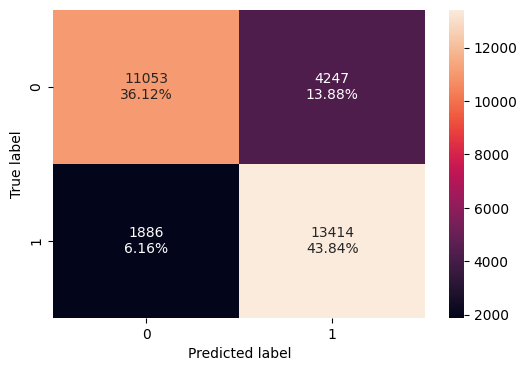

--------------------------------------------------
Performance of the best AdaBoost model on Test set: 


,Accuracy,Recall,Precision,F1
0,0.744505,0.874272,0.775426,0.821888


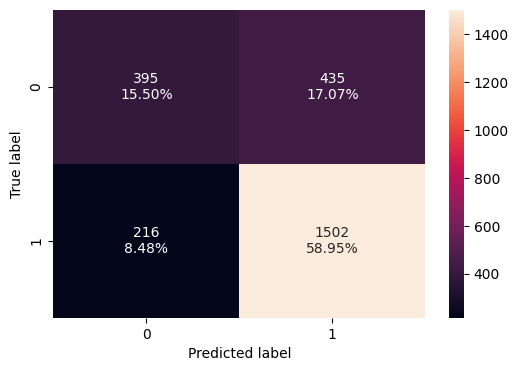

In [ ]:
# creating different combination of hyper parameters
# for the models to be created
params = {'n_estimators': [50, 100, 200, 300],
          'learning_rate': [0.01, 0.1, 1.0, 2],}

# create an instance of AdaBoost classifier model
AdaBoost_model = AdaBoostClassifier(random_state=0)

# tune the adaboost model on the oversampled version of the dataset
AdaBoost_best_model = model_tuning_report(AdaBoost_model, X_train_oversampled, X_test, y_train_oversampled, y_test,  'AdaBoost', params, 'accuracy')

### Tuning Random forest using undersampled data

Fitting 5 folds for each of 10 candidates, totalling 50 fits
--------------------------------------------------
Performance of the best RandomForest model on Train set: 


,Accuracy,Recall,Precision,F1
0,0.836019,0.856525,0.822782,0.839314


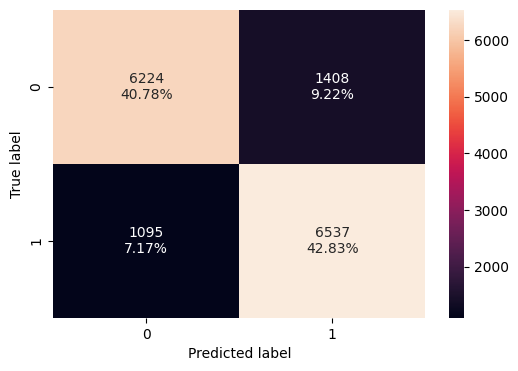

--------------------------------------------------
Performance of the best RandomForest model on Test set: 


,Accuracy,Recall,Precision,F1
0,0.718603,0.729919,0.832117,0.777674


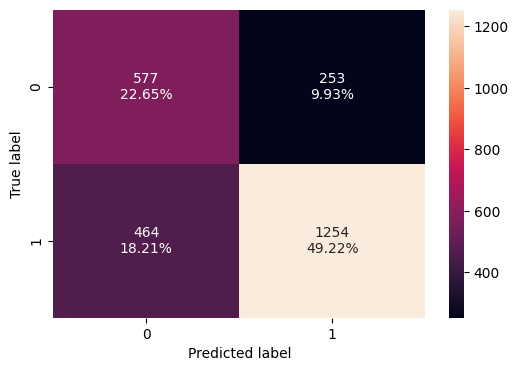

In [ ]:
# creating different combination of hyper parameters
# for the models to be created
params = {'n_estimators': [50, 100, 150,  200],
          'max_depth': [5, 10, 15],
          'max_features': ['sqrt', 'log2', None],
          'criterion': ['gini', 'entropy', 'log_loss'],
          'class_weight' : ['balanced', None]}

# create an instance of Random Forest classifier model
Random_Forest_model = RandomForestClassifier(random_state=0)

# tune the random forest model on the oversampled version of the dataset
RandomForest_best_model = model_tuning_report(Random_Forest_model, X_train_undersampled, X_test, y_train_undersampled, y_test,  'RandomForest', params, 'accuracy')

### Tuning with Gradient boosting with oversampled data

Fitting 5 folds for each of 10 candidates, totalling 50 fits
--------------------------------------------------
Performance of the best GradientBoosting model on Train set: 


,Accuracy,Recall,Precision,F1
0,0.814673,0.861765,0.787587,0.823008


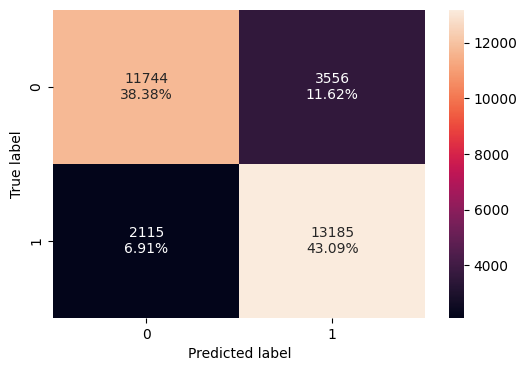

--------------------------------------------------
Performance of the best GradientBoosting model on Test set: 


,Accuracy,Recall,Precision,F1
0,0.759419,0.862631,0.797203,0.828627


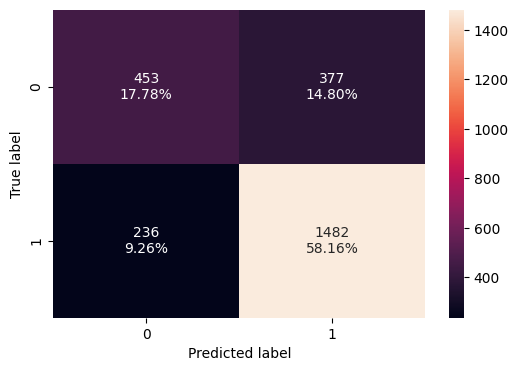

In [ ]:
# creating different combination of hyper parameters
# for the models to be created
params = {'n_estimators': [100, 200, 300],
          'learning_rate': [0.01, 0.1, 1, 2],
          'max_depth': [3, 6],
          'subsample': [0.7, 1.0], }

# create an instance of Gradient Boosting classifier model
Gradient_Boosting_model = GradientBoostingClassifier(random_state=0)

# tune the GradientBoosting model on the oversampled version of the dataset
GradientBoosting_best_model = model_tuning_report(Gradient_Boosting_model, X_train_oversampled, X_test, y_train_oversampled, y_test,  'GradientBoosting', params, 'accuracy')

### Tuning XGBoost using oversampled data

Fitting 5 folds for each of 10 candidates, totalling 50 fits
--------------------------------------------------
Performance of the best XGBoost model on Train set: 


,Accuracy,Recall,Precision,F1
0,0.828791,0.876928,0.799917,0.836654


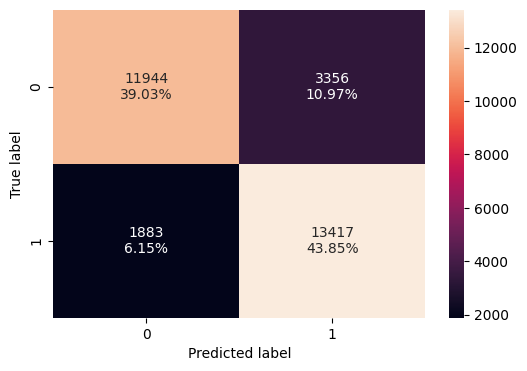

--------------------------------------------------
Performance of the best XGBoost model on Test set: 


,Accuracy,Recall,Precision,F1
0,0.760597,0.865541,0.796892,0.829799


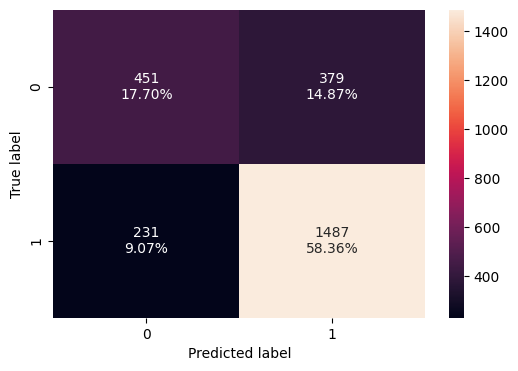

In [ ]:
# creating different combination of hyper parameters
# for the models to be created
params = {'n_estimators': [100, 200, 300],
          'learning_rate': [0.01, 0.1, 0.2],
          'max_depth': [3, 6],
          'gamma': [0, 0.2],
          'subsample': [0.7, 0.9],
          'reg_alpha': [0, 1],
          'reg_lambda': [0, 1]}

# create an instance of XGBoost classifier model
XGBoost_model = xgb.XGBClassifier(seed = 0 )

# tune the XGBoost model on the oversampled version of the dataset
XGBoost_best_model = model_tuning_report(XGBoost_model, X_train_oversampled, X_test, y_train_oversampled, y_test,  'XGBoost', params,  'accuracy')

**We have now tuned all the models, let's compare the performance of all tuned models and see which one is the best.**

## Model performance comparison and choosing the final model

In [ ]:
# list of the models created
models_list = [AdaBoost_best_model, RandomForest_best_model, GradientBoosting_best_model, XGBoost_best_model]
models_names = ['Tune AdaBoost', 'Tuned Random Forest', 'Tuned Gradient Boosting', 'Tuned XGBoost']

# make summary about the models
all_models_performances(models_list, models_names, X_test, y_test, 'Test Data', 'Accuracy')

,Accuracy,Recall,Precision,F1,Dataset
Tuned XGBoost,0.760597,0.865541,0.796892,0.829799,Test Data
Tuned Gradient Boosting,0.759419,0.862631,0.797203,0.828627,Test Data
Tune AdaBoost,0.744505,0.874272,0.775426,0.821888,Test Data
Tuned Random Forest,0.718603,0.729919,0.832117,0.777674,Test Data


Our primary goal is to accurately identify visa applicants who should be certified, as well as ensure we don't miss any valuable potential candidates.  Therefore, model performance will be evaluated using both accuracy (for overall correctness) and the F1-score (to balance precision and recall, ensuring we identify as many certifiable applicants as possible)

XGBoost appears to be the best performing model from the table, achieving __76% accuracy__ and an __82.9% F1-score__.  Therefore, we've selected it as our preferred model.

## Actionable Insights and Recommendations

We are analyzing feature importance to understand which factors most strongly influence visa approval decisions.  This analysis allows us to identify key areas for improvement in the visa process, inform data collection strategies, and develop targeted interventions.  By understanding which features are most predictive, we can derive actionable insights to streamline the process, optimize resource allocation, and ensure fairness and efficiency in visa approvals.

We used XGBoost to predict visa approvals and analyzed the resulting feature importances.  These values, derived directly from the trained XGBoost model, show the relative influence of each applicant characteristic on the model's predictions, with higher values indicating greater importance.

In [ ]:
# Create a list of columns together with their importance
Feature_importance = sorted(zip(list(X.columns), XGBoost_best_model.feature_importances_), key = lambda x: x[1], reverse = True)

# Taking a look at the importance of each feature
print('Feature importances: ')
for col, importance in Feature_importance:
  print(f'Column "{col}" = {round(importance, 2)}')

Feature importances: 
Column "has_job_experience_N" = 0.15000000596046448
Column "has_job_experience_Y" = 0.15000000596046448
Column "education_of_employee_Bachelor's" = 0.10999999940395355
Column "education_of_employee_Doctorate" = 0.10999999940395355
Column "education_of_employee_Master's" = 0.10000000149011612
Column "education_of_employee_High School" = 0.05000000074505806
Column "region_of_employment_Island" = 0.03999999910593033
Column "unit_of_wage_Year" = 0.029999999329447746
Column "continent_Europe" = 0.029999999329447746
Column "unit_of_wage_Hour" = 0.029999999329447746
Column "region_of_employment_Midwest" = 0.029999999329447746
Column "region_of_employment_West" = 0.029999999329447746
Column "region_of_employment_South" = 0.019999999552965164
Column "continent_Africa" = 0.019999999552965164
Column "region_of_employment_Northeast" = 0.019999999552965164
Column "continent_South America" = 0.009999999776482582
Column "full_time_position_Y" = 0.009999999776482582
Column "requi

__1. Job Experience and Education are Key:__  The features related to job experience (has_job_experience_Y/N) and education level (Bachelor's, Doctorate, Master's) are by far the most influential predictors.  This strongly suggests that these factors are crucial in visa approval decisions.  Actionable insights include:

 - __Gathering more detailed information:__ Ensure data collection and preprocessing accurately capture this information. Consider more granular education levels if possible (e.g., specific degrees). Capturing more specific degree information (e.g., "Master's in Computer Science" instead of just "Master's") help us to better assess applicant skills, align with national needs, and potentially improve prediction accuracy.
 - __Targeted strategies:__ The visa approval process could be optimized or customized based on these factors. For instance, applicants with higher education and extensive experience might receive expedited processing.

__2. Region of Employment Matters:__ The region of employment (Island, Midwest, West, South, Northeast) also plays a noticeable role. This indicates that economic or policy factors within specific regions influence visa approvals.

- __Regional analysis:__ Investigate why certain regions have higher or lower visa approvals. This could reveal regional economic needs, labor shortages, or specific visa programs.
- __Targeted outreach:__ If certain regions struggle to attract talent due to visa issues, targeted outreach or policy adjustments could be beneficial.
